In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', None)

### Knowledge Base

In [3]:
df_videos = pd.read_csv('2016-mlb-homeruns.csv')

In [4]:
df_videos.shape

(5499, 6)

In [5]:
df_videos.head(1)

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,video
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,John Jaso homers (6) on a fly ball to center field.,102.9,412.0,25.0,https://sporty-clips.mlb.com/YjlLTlpfWGw0TUFRPT1fQTFOVFVWQU1Vd0lBQVFjRFVnQUFDVkpVQUZsWEFnY0FVVlpRQVFGUVVsRUFCZ29D.mp4


In [6]:
df_videos[df_videos['title'].isnull()]

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,video
1561,03adb020-65cc-475f-915c-c8419ff1777c,NaN,102.8,0.0,30.0,https://sporty-clips.mlb.com/Qm85bjlfWGw0TUFRPT1fQmdJQUFBWUVWQUlBRGxkUkJRQUFCZ01BQUZnRVZnSUFVVjBCQVFwVFZ3SlNCd1VG.mp4
4447,1742069f-79c5-41f0-b95a-5adaff39b02f,NaN,NaN,0.0,NaN,https://sporty-clips.mlb.com/REEzNERfWGw0TUFRPT1fQndaVlZsUUNYMVFBRDF0UlV3QUFBRkJXQUFNTVZnQUFCd1JSVVZWVEFnb0hBQUFB.mp4


In [7]:
df_videos = df_videos[~df_videos['title'].isnull()]

In [8]:
df_videos.shape

(5497, 6)

# 1. NLP approach

### Preprocessing and Indexing

In [23]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_videos['title'])

### Searching

In [24]:
def search_videos(query, top_n=3):
    # Preprocess the query
    query_tfidf = vectorizer.transform([query])
    # Compute similarity scores
    similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()
    # Get top N results
    top_indices = similarities.argsort()[-top_n:][::-1]
    results = df_videos.iloc[top_indices]
    results['similarity'] = similarities[top_indices]
    return results

### Example usage

In [42]:
user_query = "Steven Souza"
results = search_videos(user_query)

/var/tmp/ipykernel_32464/3401540904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['similarity'] = similarities[top_indices]


In [43]:
results

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,video,similarity
4467,57d0123c-fea8-4466-bd04-e08835e1c768,Steven Souza Jr. homers (2) on a fly ball to center field.,103.4,NaN,32.0,https://sporty-clips.mlb.com/MzRsZ05fWGw0TUFRPT1fQXdZRlZGVUdWVkVBWGdkVFhnQUFCUUJRQUFOUlUxVUFWMVVOQ0FBQVZBSUdCd1Jl.mp4,0.821299
1856,1ef7e9f7-b2be-482e-ada4-081d77e3d3c8,Steven Souza Jr. homers (9) on a fly ball to left field.,106.3,373.0,22.0,https://sporty-clips.mlb.com/S2w2ZE5fWGw0TUFRPT1fQjFRSFV3RU5BQVVBV2xCUUF3QUFDUVFEQUFCUkFsVUFBbDBFVkFRQ1ZBQUJBMUZl.mp4,0.820242
3352,36ba3f7c-482c-49e5-a508-23b5da345fe1,Steven Souza Jr. homers (6) on a fly ball to left field.,103.6,402.0,30.0,https://sporty-clips.mlb.com/MFdvcUtfWGw0TUFRPT1fQlFjREJWZFNVVkVBREZvQUJRQUFDRk5UQUFBQVUxa0FBRlpYQlZkVUFnZFFWbGRY.mp4,0.820242


In [48]:
user_query = "Show me a nice video when ball was out of the field"
results = search_videos(user_query)

/var/tmp/ipykernel_32464/3401540904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['similarity'] = similarities[top_indices]


In [49]:
results

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,video,similarity
1272,d4379cb8-4592-4de7-885a-77d02a383501,J.D. Martinez homers (5) on a fly ball to center field.,106.8,423.0,31.0,https://sporty-clips.mlb.com/cjhCNGRfWGw0TUFRPT1fVWdWU1UxMVhCQW9BREZjTFZBQUFWVk5SQUZrTlZnQUFCVkpSQUFGVUFndFdCUUpY.mp4,0.290461
4812,24325967-9e9a-4f60-8a4d-1d87ef41042e,J.D. Martinez homers (6) on a fly ball to center field.,102.4,395.0,34.0,https://sporty-clips.mlb.com/ZThRYnlfWGw0TUFRPT1fQkFWU1ZsRU5VQVVBQVFjTEJ3QUFWd0JXQUZsVVZ3VUFBd0VOQjFaVEJRSlZCQUFE.mp4,0.290461
4639,19d606ea-32ca-47a0-ae43-3d5471f44648,J.D. Martinez homers (1) on a fly ball to left field.,102.9,403.0,26.0,https://sporty-clips.mlb.com/eU5YUWVfWGw0TUFRPT1fQndnRlVsUUNBMU1BQzFCUkJ3QUFCbGRXQUFCUVYxSUFBUUVBQkFRRVZ3ZFJCZ1pl.mp4,0.289321


### Conclusion

The example above makes this solution unsatisfying.

The issue likely arises because TF-IDF is a **bag-of-words** approach and **doesn't consider semantic relationships between words**.

### Notes

**TfidfVectorizer** converts text into numerical feature vectors using Term Frequency-Inverse Document Frequency, giving for each word in text a value which is multiplication of TF and IDF.

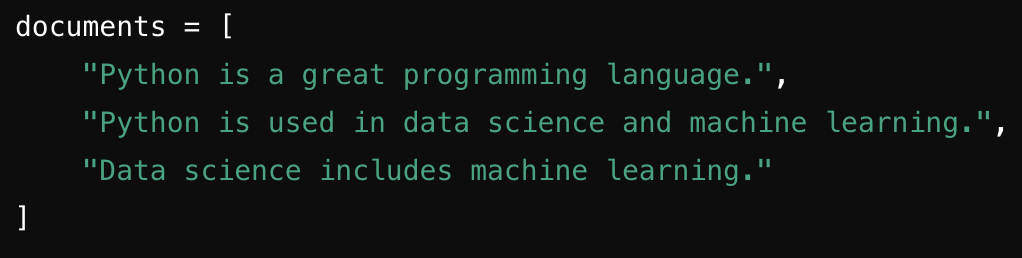
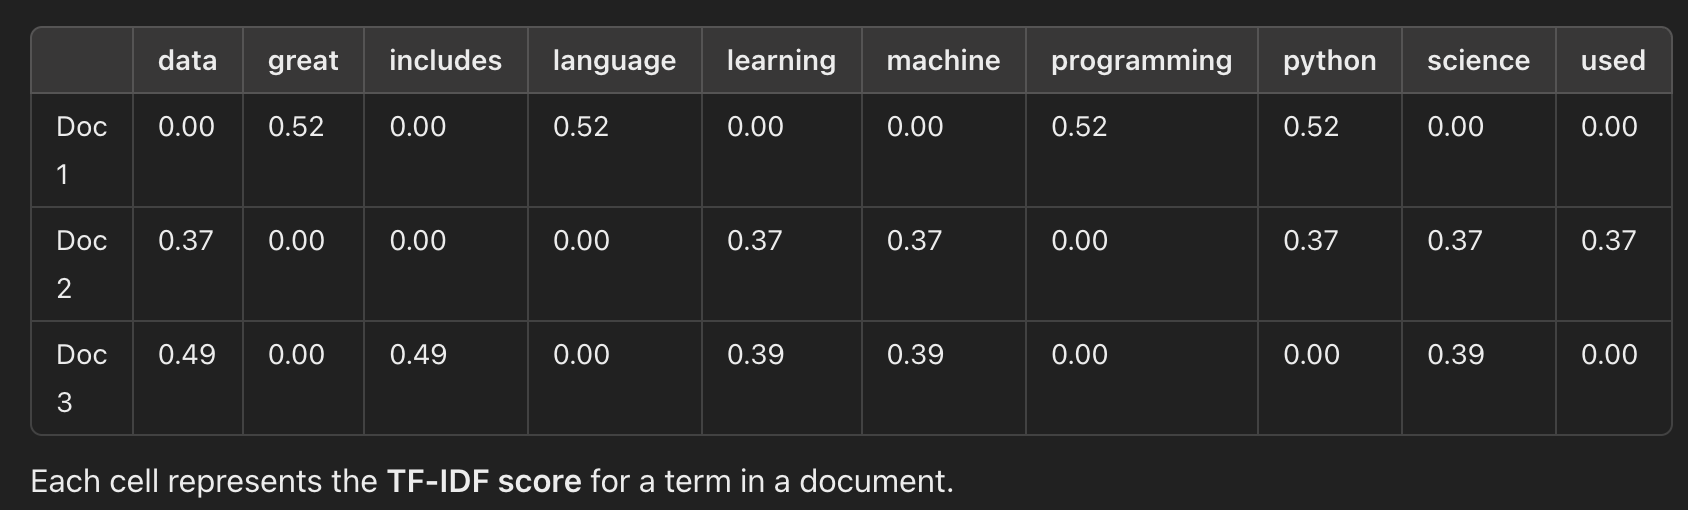

**Cosine similarity** is a metric, it's a cosine of an angle between two vectors. Widely used in NLP for text comparisons.

# 2. Semantic Retriever - Gemini API

https://ai.google.dev/gemini-api/docs/semantic_retrieval?utm_source=chatgpt.com

In [52]:
pip install -U google.ai.generativelanguage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Setup

In [9]:
service_account_file_name = '../service_account_key.json'

from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(service_account_file_name)

scoped_credentials = credentials.with_scopes(
    ['https://www.googleapis.com/auth/cloud-platform', 'https://www.googleapis.com/auth/generative-language.retriever'])

In [10]:
import google.ai.generativelanguage as glm
generative_service_client = glm.GenerativeServiceClient(credentials=scoped_credentials)
retriever_service_client = glm.RetrieverServiceClient(credentials=scoped_credentials)
permission_service_client = glm.PermissionServiceClient(credentials=scoped_credentials)

## Corpus

**Corpus** in the context of Google's Gemini API (and semantic retrieval in general) refers to a structured collection of data that you want the model to search through.

### Remove existing corpuses

In [43]:
list_corpora_response = retriever_service_client.list_corpora()
for corpus in list_corpora_response.corpora:
    print(f"Corpus ID: {corpus.name}, Display Name: {corpus.display_name}")

Corpus ID: corpora/tiktoks-from-mlb-d1wx4hjv7u7e, Display Name: Tiktoks from MLB
Corpus ID: corpora/tiktoks-from-mlb-ojou5zmb0po3, Display Name: Tiktoks from MLB


In [71]:
list_documents_request = glm.ListDocumentsRequest(parent="corpora/tiktoks-from-mlb-ojou5zmb0po3")
list_documents_response = retriever_service_client.list_documents(list_documents_request)

for document in list_documents_response.documents:
    print(f"Document ID: {document.name}, Title: {document.display_name}")

Document ID: corpora/tiktoks-from-mlb-ojou5zmb0po3/documents/2016mlbhomeruns-g3hz29gxsn44, Title: 2016-mlb-homeruns


In [72]:
for document in list_documents_response.documents:
    print(f"Document ID: {document.name}")
    print(f"Document Details: {document}")

Document ID: corpora/tiktoks-from-mlb-ojou5zmb0po3/documents/2016mlbhomeruns-g3hz29gxsn44
Document Details: name: "corpora/tiktoks-from-mlb-ojou5zmb0po3/documents/2016mlbhomeruns-g3hz29gxsn44"
display_name: "2016-mlb-homeruns"
custom_metadata {
  key: "file_name"
  string_value: "2016-mlb-homeruns.csv"
}
update_time {
  seconds: 1738178630
  nanos: 801653000
}
create_time {
  seconds: 1738178630
  nanos: 801653000
}



In [ ]:
for document in list_documents_response.documents:
    delete_document_request = glm.DeleteDocumentRequest(name=document.name)
    retriever_service_client.delete_document(delete_document_request)
    print(f"Deleted Document: {document.name}")

In [49]:
document_name = "corpora/tiktoks-from-mlb-d1wx4hjv7u7e/documents/2016mlbhomeruns-hv5fun8t45ch"

get_document_request = glm.GetDocumentRequest(name=document_name)
document_details = retriever_service_client.get_document(get_document_request)

print(document_details)


name: "corpora/tiktoks-from-mlb-d1wx4hjv7u7e/documents/2016mlbhomeruns-hv5fun8t45ch"
display_name: "2016-mlb-homeruns"
update_time {
  seconds: 1738311613
  nanos: 259269000
}
create_time {
  seconds: 1738177510
  nanos: 375636000
}



In [50]:
get_document_request = glm.GetDocumentRequest(name=document_name)
document_details = retriever_service_client.get_document(get_document_request)

print(document_details)


name: "corpora/tiktoks-from-mlb-d1wx4hjv7u7e/documents/2016mlbhomeruns-hv5fun8t45ch"
display_name: "2016-mlb-homeruns"
update_time {
  seconds: 1738311613
  nanos: 259269000
}
create_time {
  seconds: 1738177510
  nanos: 375636000
}



In [64]:
get_document_request = glm.GetDocumentRequest(name=document_name)
document_details = retriever_service_client.get_document(get_document_request)

print("Full document details:", document_details)


Full document details: name: "corpora/tiktoks-from-mlb-d1wx4hjv7u7e/documents/2016mlbhomeruns-hv5fun8t45ch"
display_name: "2016-mlb-homeruns"
update_time {
  seconds: 1738312303
  nanos: 674302000
}
create_time {
  seconds: 1738177510
  nanos: 375636000
}



In [71]:
# Force delete of document even if contains some content

document_name = 'corpora/tiktoks-from-mlb-ojou5zmb0po3/documents/2016mlbhomeruns-g3hz29gxsn44'
delete_document_request = glm.DeleteDocumentRequest(
    name=document_name,
    force=True  # If the API supports this
)

try:
    retriever_service_client.delete_document(delete_document_request)
    print(f"Document {document_name} force-deleted successfully.")
except Exception as e:
    print(f"Error force-deleting document {document_name}: {e}")


Document corpora/tiktoks-from-mlb-ecz04so6tdfy/documents/2016mlbhomeruns-fdsv1g96xeu5 force-deleted successfully.


In [77]:
# Delete Corpus

delete_corpus_request = glm.DeleteCorpusRequest(name="corpora/tiktoks-from-mlb-ojou5zmb0po3")
retriever_service_client.delete_corpus(delete_corpus_request)
print("Corpus deleted successfully.")

Corpus deleted successfully.


### Create Corpus

#### Search for existing Corpus

In [13]:
list_corpora_response = retriever_service_client.list_corpora()

existing_corpus = None
for corpus in list_corpora_response.corpora:
    if corpus.display_name == "Tiktoks from MLB":  # Change this name as needed
        existing_corpus = corpus
        break

if existing_corpus:
    print(f"Corpus already exists: {existing_corpus.name}")
    corpus_resource_name = existing_corpus.name
else:
    print("Corpus does not exist. Creating a new one...")


Corpus already exists: corpora/tiktoks-from-mlb-ecz04so6tdfy


#### Create Corpus

In [79]:
corpus = glm.Corpus(display_name="Tiktoks from MLB")
create_corpus_request = glm.CreateCorpusRequest(corpus=corpus)

In [80]:
# Make the request
create_corpus_response = retriever_service_client.create_corpus(create_corpus_request)

In [81]:
# Set the `corpus_resource_name` for subsequent sections.
corpus_resource_name = create_corpus_response.name
print(create_corpus_response)

name: "corpora/tiktoks-from-mlb-ecz04so6tdfy"
display_name: "Tiktoks from MLB"
create_time {
  seconds: 1738312930
  nanos: 879850000
}
update_time {
  seconds: 1738312930
  nanos: 879850000
}



### Get the created corpus

In [14]:
get_corpus_request = glm.GetCorpusRequest(name=corpus_resource_name)

# Make the request
get_corpus_response = retriever_service_client.get_corpus(get_corpus_request)

# Print the response
print(get_corpus_response)

name: "corpora/tiktoks-from-mlb-ecz04so6tdfy"
display_name: "Tiktoks from MLB"
create_time {
  seconds: 1738312930
  nanos: 879850000
}
update_time {
  seconds: 1738312930
  nanos: 879850000
}



## Document

A Corpus can contain up to 10,000 Documents. 

Show all existing documents in the Corpus

In [72]:
list_documents_request = glm.ListDocumentsRequest(parent=corpus_resource_name)
list_documents_response = retriever_service_client.list_documents(list_documents_request)

for document in list_documents_response.documents:
    print(f"Document ID: {document.name}, Title: {document.display_name}")
    document_resource_name = document.name

### Create a document

In [73]:
# Create a document with a custom display name.
document = glm.Document(display_name="2016-mlb-homeruns")

In [74]:
# Add metadata.
# Metadata also supports numeric values not specified here
document_metadata = [
    glm.CustomMetadata(key="file_name", string_value="2016-mlb-homeruns.csv")]
document.custom_metadata.extend(document_metadata)

In [75]:
# Make the request
# corpus_resource_name is a variable set in the "Create a corpus" section.
create_document_request = glm.CreateDocumentRequest(parent=corpus_resource_name, document=document)
create_document_response = retriever_service_client.create_document(create_document_request)

In [76]:
# Set the `document_resource_name` for subsequent sections.
document_resource_name = create_document_response.name
print(create_document_response)

name: "corpora/tiktoks-from-mlb-ecz04so6tdfy/documents/2016mlbhomeruns-ygfkplbos8x6"
display_name: "2016-mlb-homeruns"
custom_metadata {
  key: "file_name"
  string_value: "2016-mlb-homeruns.csv"
}
update_time {
  seconds: 1739876021
  nanos: 861763000
}
create_time {
  seconds: 1739876021
  nanos: 861763000
}



### Get the created document

In [77]:
get_document_request = glm.GetDocumentRequest(name=document_resource_name)

# Make the request
# document_resource_name is a variable set in the "Create a document" section.
get_document_response = retriever_service_client.get_document(get_document_request)

# Print the response
print(get_document_response)

name: "corpora/tiktoks-from-mlb-ecz04so6tdfy/documents/2016mlbhomeruns-ygfkplbos8x6"
display_name: "2016-mlb-homeruns"
custom_metadata {
  key: "file_name"
  string_value: "2016-mlb-homeruns.csv"
}
update_time {
  seconds: 1739876021
  nanos: 861763000
}
create_time {
  seconds: 1739876021
  nanos: 861763000
}



## Ingest & Chunk a Document

In [78]:
# import csv
# import google.ai.generativelanguage as glm

# # Initialize the retriever service client
# retriever_service_client = glm.RetrieverServiceClient(credentials=scoped_credentials)

# # Function to split text into chunks within the specified byte limit
# def split_text_into_chunks(text, byte_limit):
#     words = text.split()
#     chunks = []
#     current_chunk = []
#     current_size = 0

#     for word in words:
#         word_size = len(word.encode('utf-8')) + 1  # +1 for the space or newline
#         if current_size + word_size > byte_limit:
#             chunks.append(' '.join(current_chunk))
#             current_chunk = [word]
#             current_size = word_size
#         else:
#             current_chunk.append(word)
#             current_size += word_size

#     if current_chunk:
#         chunks.append(' '.join(current_chunk))

#     return chunks

# # Read the CSV file
# csv_file_path = '2016-mlb-homeruns.csv'
# with open(csv_file_path, newline='') as csvfile:
#     csv_reader = csv.reader(csvfile)
#     csv_content = '\n'.join([','.join(row) for row in csv_reader])


# # Define the byte limit per chunk (e.g., 10 KB)
# byte_limit = 2000

# # Split the CSV content into chunks
# chunks = split_text_into_chunks(csv_content, byte_limit)

In [79]:
import pandas as pd

df_homeruns = pd.read_csv('2016-mlb-homeruns.csv')
df_homeruns.head(1)

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,video
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,John Jaso homers (6) on a fly ball to center field.,102.9,412.0,25.0,https://sporty-clips.mlb.com/YjlLTlpfWGw0TUFRPT1fQTFOVFVWQU1Vd0lBQVFjRFVnQUFDVkpVQUZsWEFnY0FVVlpRQVFGUVVsRUFCZ29D.mp4


In [80]:
result_dict = {row[1]: index for index, row in df_homeruns.iterrows() for col in ["title"]}
for key, value in result_dict.items():
    print(f"key: {key}, value: {value}")
    break

/var/tmp/ipykernel_4581/3239257153.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_dict = {row[1]: index for index, row in df_homeruns.iterrows() for col in ["title"]}


key: John Jaso homers (6) on a fly ball to center field., value: 0


In [81]:
chunks = df_homeruns["title"].tolist()

## Batch create chunks, create and upload each chunk

In [82]:
# Create and upload each chunk
for i, chunk_text in enumerate(chunks):
    print(f'{i+1} out of {len(chunks)}')
    # Create chunk objest from chunk of text
    chunk = glm.Chunk(data={'string_value': chunk_text})
    chunk.custom_metadata.append(glm.CustomMetadata(key="part", string_value=f"Part {i+1}"))
    # glm.CreateChunkRequest prepares the API request to upload the chunk to GCP
    create_chunk_request = glm.CreateChunkRequest(parent=document_resource_name, chunk=chunk)
    retriever_service_client.create_chunk(create_chunk_request)
    print(chunk_text)
    if i+1 == 4:
        print('break') 
        break ########### quick test

1 out of 5499
John Jaso homers (6) on a fly ball to center field.
2 out of 5499
Evan Longoria homers (34) on a fly ball to left center field.   Kevin Kiermaier scores.
3 out of 5499
Marwin Gonzalez homers (13) on a line drive to right field.
4 out of 5499
Eddie Rosario homers (10) on a fly ball to right field.
break


In [83]:
chunk

data {
  string_value: "Eddie Rosario homers (10) on a fly ball to right field."
}
custom_metadata {
  key: "part"
  string_value: "Part 4"
}

## Query the corpus

Perform semantic search

In [107]:
# Define the user query
user_query = "Who smacks a home run on a soaring shot"
content = glm.Content(parts=[glm.Part(text=user_query)])

# Configure the semantic retriever
retriever_config = glm.SemanticRetrieverConfig(source=corpus_resource_name, query=content)

# Create the request
generate_answer_request = glm.GenerateAnswerRequest(
    model="models/aqa",
    contents=[content],
    semantic_retriever=retriever_config,
    answer_style="ABSTRACTIVE"  # Options: ABSTRACTIVE, VERBOSE, EXTRACTIVE
)

# Make the request
aqa_response = generative_service_client.generate_answer(generate_answer_request)

# Output the response
# final answer based on the model's understanding and retrieved information.
print(aqa_response.answer.content.parts[0].text)
print('\n')
# This outputs the first piece of source material that contributed to the AI's answer.
print(aqa_response.answer.grounding_attributions[0].content.parts[0].text)
print('\n')
print(aqa_response)

John Jaso, Eddie Rosario, Marwin Gonzalez and Evan Longoria all hit home runs.


John Jaso homers (6) on a fly ball to center field.


answer {
  content {
    parts {
      text: "John Jaso, Eddie Rosario, Marwin Gonzalez and Evan Longoria all hit home runs."
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_SEXUALLY_EXPLICIT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
  }
  grounding_attributions {
    content {
      parts {
        text: "John Jaso homers (6) on a fly ball to center field."
      }
    }
    source_id {
      semantic_retriever_chunk {
        source: "corpora/tiktoks-from-mlb-ecz04so6tdfy"
        chunk: "corpora/tiktoks-from-mlb-ecz04so6tdfy/documents/2016mlbhomeruns-ygfkplbos8

In [108]:
# Define the user query
user_query = "Who scored?"
content = glm.Content(parts=[glm.Part(text=user_query)])

# Configure the semantic retriever
retriever_config = glm.SemanticRetrieverConfig(source=corpus_resource_name, query=content)

# Create the request
generate_answer_request = glm.GenerateAnswerRequest(
    model="models/aqa",
    contents=[content],
    semantic_retriever=retriever_config,
    answer_style="ABSTRACTIVE"  # Options: ABSTRACTIVE, VERBOSE, EXTRACTIVE
)

# Make the request
aqa_response = generative_service_client.generate_answer(generate_answer_request)

# Output the response
# final answer based on the model's understanding and retrieved information.
print(aqa_response.answer.content.parts[0].text)
print('\n')
# This outputs the first piece of source material that contributed to the AI's answer.
print(aqa_response.answer.grounding_attributions[0].content.parts[0].text)
print('\n')
print(aqa_response)

Kevin Kiermaier scores.


Evan Longoria homers (34) on a fly ball to left center field.   Kevin Kiermaier scores.


answer {
  content {
    parts {
      text: "Kevin Kiermaier scores."
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_SEXUALLY_EXPLICIT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
  }
  grounding_attributions {
    content {
      parts {
        text: "Evan Longoria homers (34) on a fly ball to left center field.   Kevin Kiermaier scores."
      }
    }
    source_id {
      semantic_retriever_chunk {
        source: "corpora/tiktoks-from-mlb-ecz04so6tdfy"
        chunk: "corpora/tiktoks-from-mlb-ecz04so6tdfy/documents/2016mlbhomeruns-ygfkplbos8x6/chunks/pz711rxe0vm7"
      }
    }
